# RANDOM FOREST

In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [12]:
df = pd.read_csv('clean_and_encoded_df.csv')

baseline_cols = ["Country", "Job_type", "Education", "Company_size", "Age", "Work_experience", "Annual_salary"]

# Add Job_title columns to the baseline_cols list
Job_title = ['Developer, game or graphics', 'Blockchain', 'Developer, QA or test', 'Developer, back-end', 'Student', 
             'Project manager', 'Data or business analyst', 'Cloud infrastructure engineer', 'Engineer, data', 
             'Educator', 'Developer, desktop or enterprise applications', 'Developer, front-end', 'Designer', 
             'Security professional', 'Developer, embedded applications or devices', 'Product manager', 'Developer, mobile', 
             'Developer, full-stack', 'Scientist', 'Database administrator', 'Academic researcher', 'Senior Executive (C-Suite, VP, etc.)', 
             'Marketing or sales professional', 'System administrator', 'Data scientist or machine learning specialist', 
             'Engineer, site reliability', 'DevOps specialist', 'Engineering manager']

baseline_cols.extend(Job_title)

# Iterate through the columns and keep only those containing the specified keywords
columns_to_keep = [col for col in df.columns if any(keyword in col for keyword in baseline_cols)]

# Filter the DataFrame, keeping only the selected columns
baseline_df = df[columns_to_keep]


baseline_df.head()

,Education,Company_size,Age,Job_type_Full-time employed,Job_type_Independent contractor / Freelancer / Self-employed,Job_type_Other,Job_type_Part-time employed,Country_Andorra,Country_Angola,Country_Argentina,...,Marketing or sales professional,Product manager,Project manager,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator,Work_experience,Annual_salary
0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,4.8,40205.0
1,3.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,6.4,52769.0
2,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,6.0,54025.0
3,2.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,7.8,72243.0
4,0.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,11.4,62820.0


In [13]:
base_X = baseline_df.drop('Annual_salary', axis=1)
y = baseline_df['Annual_salary']
print(base_X.shape)
print(y.shape)

(2805, 138)
(2805,)


In [14]:
# Divide the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(base_X, y, test_size=0.2, random_state=42)
y_train = y_train.reset_index(drop=True)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
'''from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir la distribución de los hiperparámetros que deseas explorar
param_dist = {
    "n_estimators": randint(10, 200),
    "max_features": randint(1, X_train_scaled.shape[1]),
    "max_depth": randint(1, 30),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 10),
    "bootstrap": [True, False],
}

# Crear el objeto del modelo RandomForest
rf_model = RandomForestRegressor(random_state=42)

# Crear el objeto RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_model, param_distributions=param_dist, n_iter=100, cv=5, scoring="r2", n_jobs=-1, random_state=42, verbose=2
)

# Ajustar el modelo utilizando RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

# Crear el modelo con los mejores hiperparámetros
best_rf_model = random_search.best_estimator_'''

'from sklearn.model_selection import RandomizedSearchCV\nfrom scipy.stats import randint\n\n# Definir la distribución de los hiperparámetros que deseas explorar\nparam_dist = {\n    "n_estimators": randint(10, 200),\n    "max_features": randint(1, X_train_scaled.shape[1]),\n    "max_depth": randint(1, 30),\n    "min_samples_split": randint(2, 10),\n    "min_samples_leaf": randint(1, 10),\n    "bootstrap": [True, False],\n}\n\n# Crear el objeto del modelo RandomForest\nrf_model = RandomForestRegressor(random_state=42)\n\n# Crear el objeto RandomizedSearchCV\nrandom_search = RandomizedSearchCV(\n    rf_model, param_distributions=param_dist, n_iter=100, cv=5, scoring="r2", n_jobs=-1, random_state=42, verbose=2\n)\n\n# Ajustar el modelo utilizando RandomizedSearchCV\nrandom_search.fit(X_train_scaled, y_train)\n\n# Mostrar los mejores hiperparámetros encontrados\nprint("Mejores hiperparámetros encontrados:")\nprint(random_search.best_params_)\n\n# Crear el modelo con los mejores hiperparáme

In [16]:
# With Adj R2

k = 5
num_val_samples = len(X_train_scaled) // k
all_scores_r2_rf = []
all_scores_rmse_rf = []
all_scores_mae_rf = []
all_scores_adj_r2_rf = []

for i in range(k):
    print('processing fold #', i)
    val_data = X_train_scaled[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [X_train_scaled[:i * num_val_samples],
         X_train_scaled[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

    model = RandomForestRegressor(
        bootstrap=True,
        max_depth=23,
        max_features=52,
        min_samples_leaf=2,
        min_samples_split=5,
        n_estimators=115,
        random_state=42
    )
    model.fit(partial_train_data, partial_train_targets)

    val_preds = model.predict(val_data)
    r2_val = r2_score(val_targets, val_preds)
    rmse_val = np.sqrt(mean_squared_error(val_targets, val_preds))
    mae_val = mean_absolute_error(val_targets, val_preds)

    n = len(val_data)
    p = partial_train_data.shape[1]
    adjusted_r2_val = 1 - (1 - r2_val) * (n - 1) / (n - p - 1)
    all_scores_adj_r2_rf.append(adjusted_r2_val)

    all_scores_r2_rf.append(r2_val)
    all_scores_rmse_rf.append(rmse_val)
    all_scores_mae_rf.append(mae_val)

mean_r2_rf = np.mean(all_scores_r2_rf)
std_r2_rf = np.std(all_scores_r2_rf)
mean_rmse_rf = np.mean(all_scores_rmse_rf)
std_rmse_rf = np.std(all_scores_rmse_rf)
mean_mae_rf = np.mean(all_scores_mae_rf)
std_mae_rf = np.std(all_scores_mae_rf)

mean_adj_r2_rf = np.mean(all_scores_adj_r2_rf)
std_adj_r2_rf = np.std(all_scores_adj_r2_rf)

print(f"Avg performance R2 (Random Forest): {mean_r2_rf:.3f} (+/- {std_r2_rf:.3f})")
print(f"Avg performance ADJ R2 (Random Forest): {mean_adj_r2_rf:.3f} (+/- {std_adj_r2_rf:.3f})")
print(f"Avg performance RMSE (Random Forest): {mean_rmse_rf:.3f} (+/- {std_rmse_rf:.3f})")
print(f"Avg performance MAE (Random Forest): {mean_mae_rf:.3f} (+/- {std_mae_rf:.3f})")



processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
Avg performance R2 (Random Forest): 0.601 (+/- 0.034)
Avg performance ADJ R2 (Random Forest): 0.423 (+/- 0.049)
Avg performance RMSE (Random Forest): 31887.376 (+/- 1604.242)
Avg performance MAE (Random Forest): 23507.938 (+/- 1244.256)


In [17]:
rf_results_dic = {}

rf_results_dic['RandomForest'] = {'R2': mean_r2_rf, 'Adj R2': mean_adj_r2_rf, 'RMSE': mean_rmse_rf, 'MAE': mean_mae_rf}
rf_results  = pd.DataFrame.from_dict(rf_results_dic, orient='index')
rf_results 

,R2,Adj R2,RMSE,MAE
RandomForest,0.601365,0.423334,31887.375925,23507.937636


In [18]:
rf_results.to_csv('rf_results.csv', index=True)

In [19]:
# Combinar conjuntos de datos de entrenamiento y validación
X_train_val = np.concatenate((X_train_scaled, val_data), axis=0)
y_train_val = np.concatenate((y_train, val_targets), axis=0)

# Entrenar el modelo utilizando el conjunto de datos combinado
model.fit(X_train_val, y_train_val)

# Hacer predicciones en el conjunto de datos de prueba
y_pred = model.predict(X_test_scaled)

# Calcular métricas de rendimiento en el conjunto de datos de prueba
r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test = mean_absolute_error(y_test, y_pred)
n_test = len(X_test_scaled)
p_test = X_train_val.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)

print(f"Rendimiento R2 en el conjunto de prueba (MLR): {r2_test:.3f}")
print(f"Rendimiento adjusted R2 en el conjunto de prueba (MLR): {adjusted_r2_test:.3f}")
print(f"Rendimiento RMSE en el conjunto de prueba (MLR): {rmse_test:.3f}")
print(f"Rendimiento MAE en el conjunto de prueba (MLR): {mae_test:.3f}")

Rendimiento R2 en el conjunto de prueba (MLR): 0.648
Rendimiento adjusted R2 en el conjunto de prueba (MLR): 0.533
Rendimiento RMSE en el conjunto de prueba (MLR): 30077.655
Rendimiento MAE en el conjunto de prueba (MLR): 22018.836


In [20]:
test_results_dic = {}
test_results_dic['RandomForest'] = {'R2': r2_test,  'Adj R2': adjusted_r2_test, 'RMSE': rmse_test, 'MAE': mae_test}
test_results = pd.DataFrame.from_dict(test_results_dic, orient='index')
test_results

,R2,Adj R2,RMSE,MAE
RandomForest,0.648157,0.5331,30077.654504,22018.83567


In [21]:
test_results.to_csv('test_rf_results.csv', index=True)

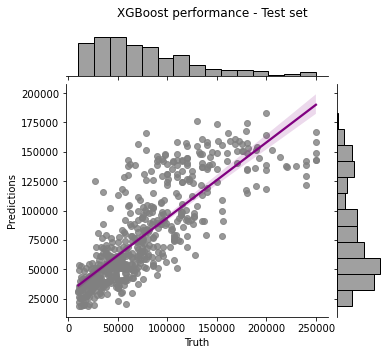

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una cuadrícula de gráficos conjunta y configurar los ejes para los histogramas
g = sns.JointGrid(x=y_test, y=y_pred, height=5)

# Crear un gráfico de dispersión y ajustar una línea de regresión lineal a los datos
g.plot_joint(sns.regplot, scatter_kws={'color': 'grey'}, line_kws={'color': 'purple'})

# Agregar histogramas en la parte superior y en el lado derecho del gráfico
g.plot_marginals(sns.histplot, kde=False, color='grey')

# Ajustar el espacio entre los subgráficos y mover el título hacia arriba
g.fig.subplots_adjust(top=0.9)

# Agregar título
g.fig.suptitle("XGBoost performance - Test set")

# Etiquetar los ejes
g.ax_joint.set_xlabel("Truth")
g.ax_joint.set_ylabel("Predictions")

plt.show()